 Title:  Data EDA  on Titanic
  Name: bethsheba chepkirui
  Date: 01 06 2025

In [1]:
# Import libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Static plots
import seaborn as sns  # Statistical plots
import missingno as msno  # Missing data visualization

# Configuring Seaborn plot aesthetics
sns.set_theme(style='darkgrid', context='notebook')

import warnings
warnings.filterwarnings("ignore")
# Load Data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

1.Initial Data Exploration

The dataset has 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

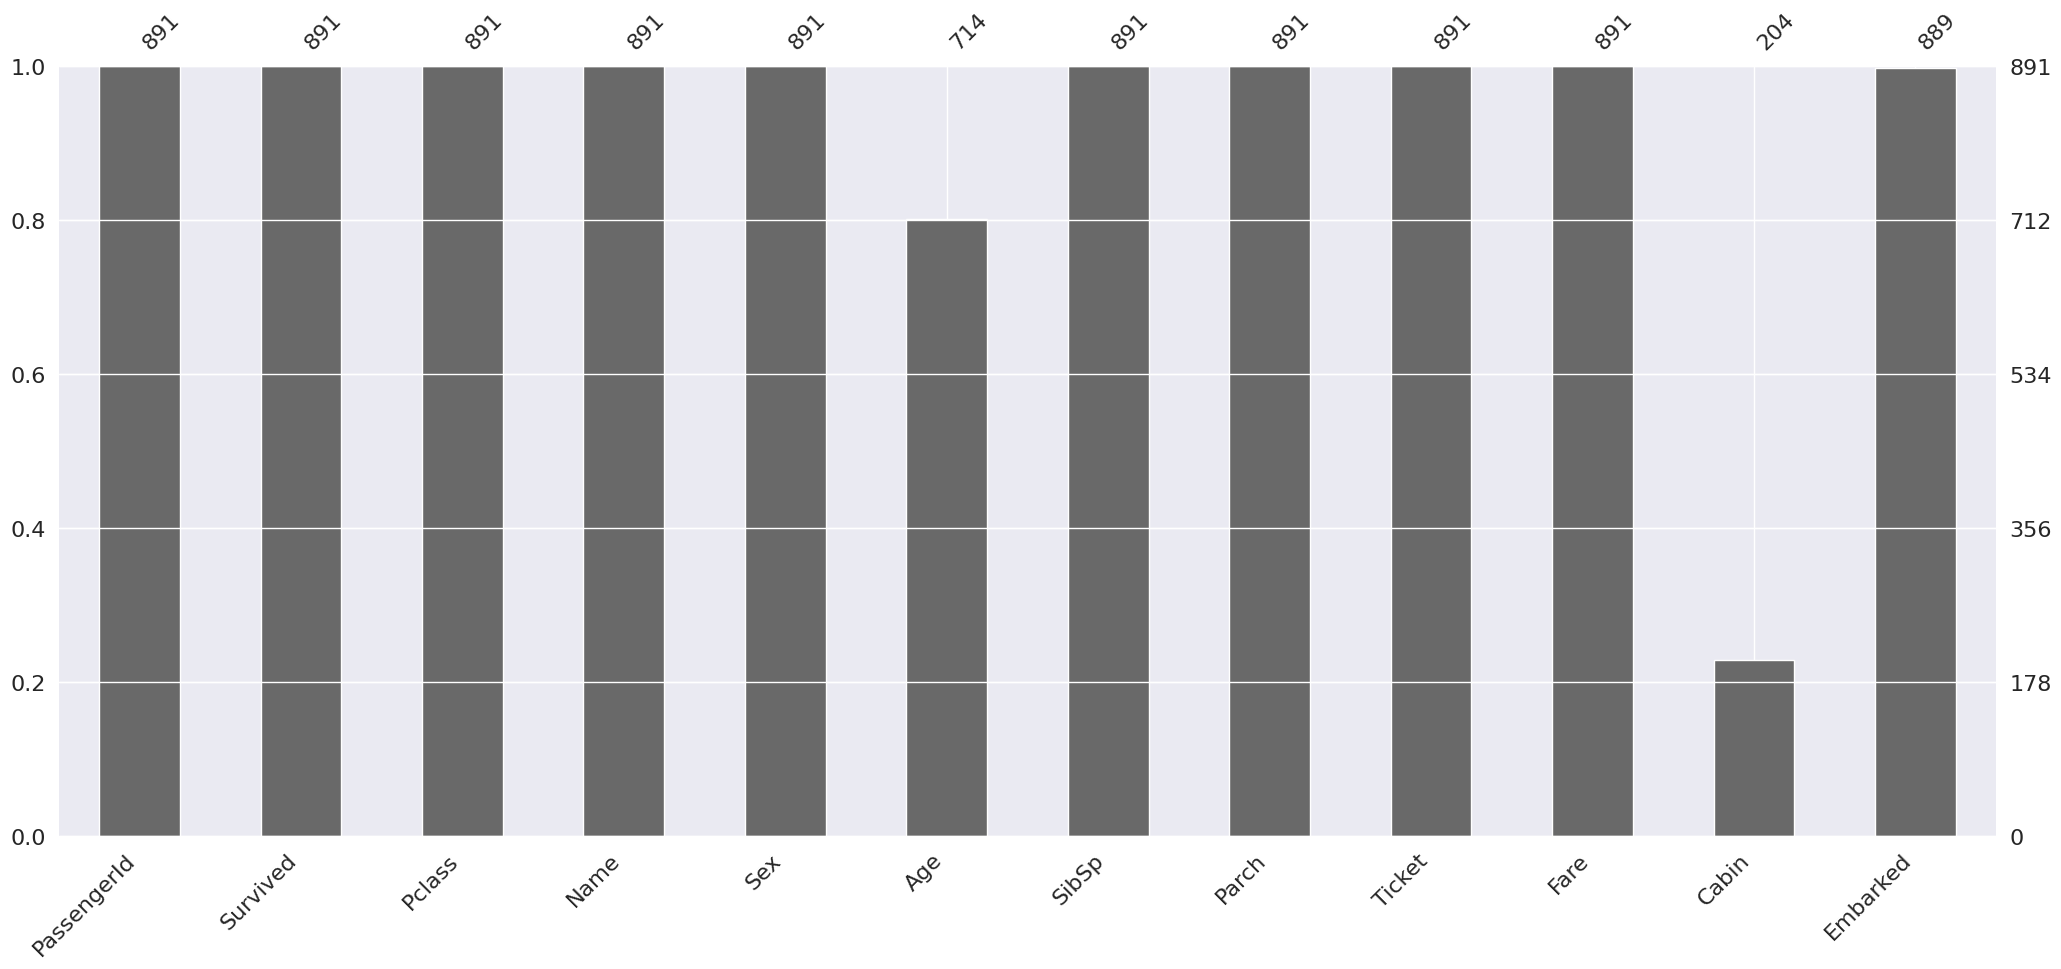

In [2]:
# Preview the first 5 rows of the dataset
train.head()
#Checking the Size of the Dataset
# Get the number of rows and columns
print(f'The dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
#Summary of Columns and Data Types
# Get an overview of the dataset’s columns and their data types
train.info()
# Count the unique values in each column
train.nunique()
# check for duplicates
train.duplicated().sum()
# Visualize missing data using missingno library
import missingno as msno
msno.bar(train)

Univariate Analysis

Histogram
Histograms are used to visualize the frequency distribution of numerical data

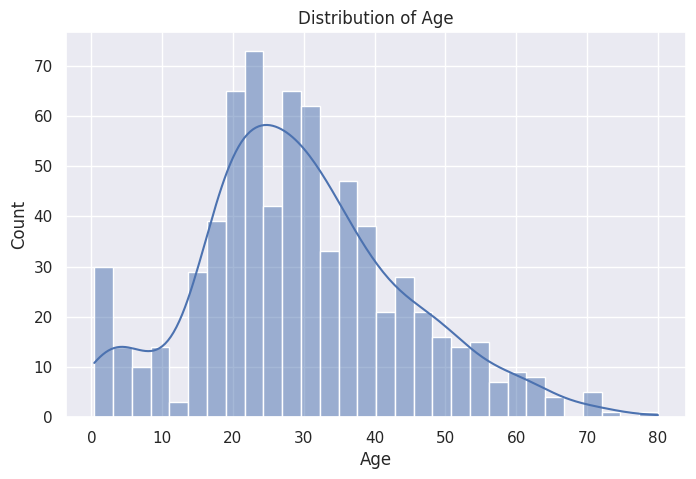

In [3]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Are ticket prices evenly distributed, or are they skewed

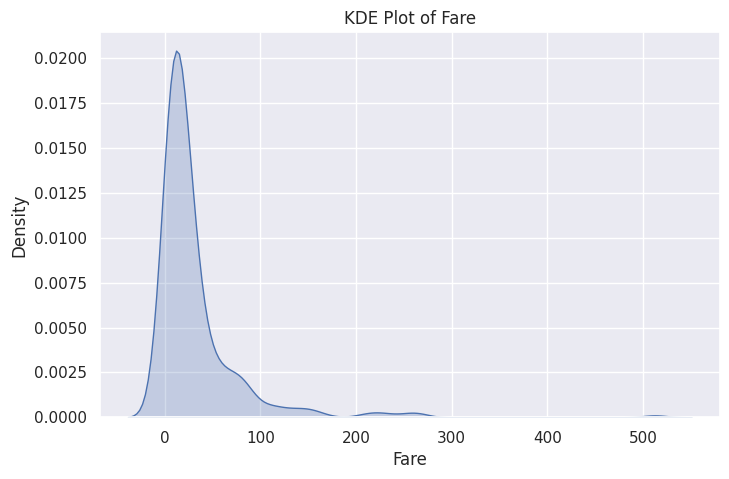

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # Assuming you also want to use seaborn

# KDE Plot for Fare
plt.figure(figsize=(8, 5))
sns.kdeplot(train['Fare'], shade=True)
plt.title('KDE Plot of Fare')
plt.xlabel('Fare')
plt.show()

Bivariate Analysis
Bivariate analysis involves exploring the relationship between two variables

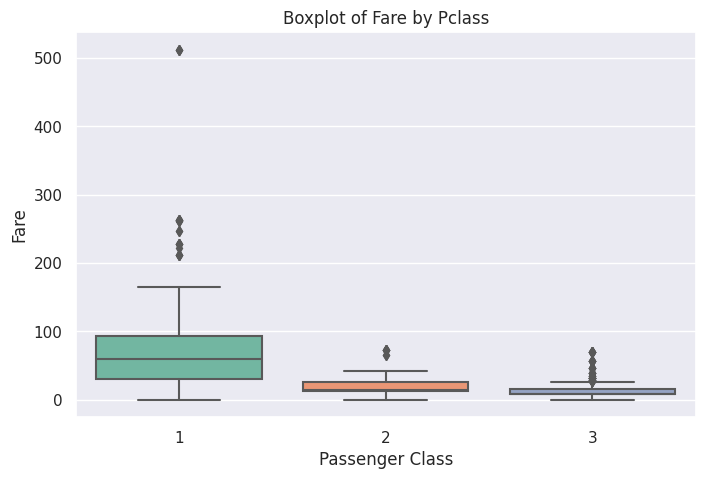

In [5]:
#Does the Fare change depending on the Pclass
# Boxplot of Fare grouped by Pclass
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=train, palette='Set2')
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

Are younger passengers more likely to survive on the Titanic

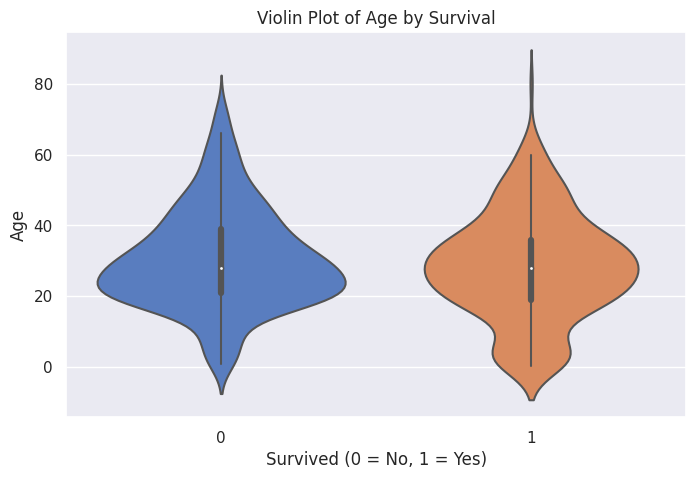

In [6]:
# Violin plot of Age grouped by Survived
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Age', data=train, split=True, palette='muted')
plt.title('Violin Plot of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

Does the Embarked location affect survival rate

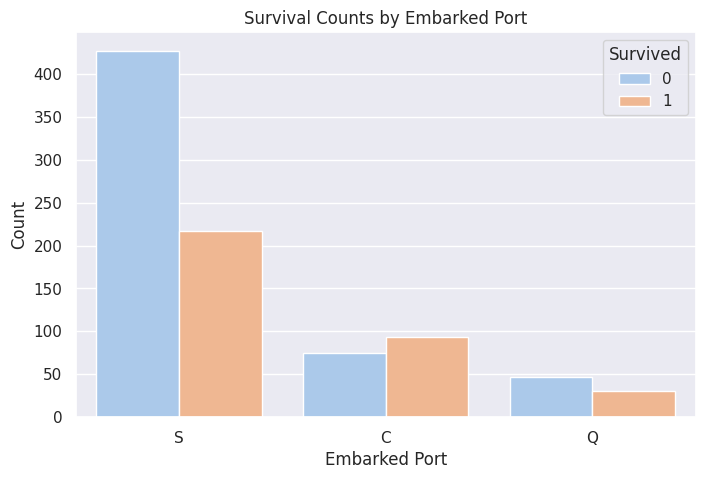

In [7]:
# Grouped bar plot of Survived vs Embarked
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='pastel')
plt.title('Survival Counts by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

In [8]:
4.Multivariate analysis
Multivariate analysis involves exploring relationships between three or more variables simultaneously

SyntaxError: invalid decimal literal (3860332278.py, line 1)

How do Pclass, Age, and Fare jointly affect survival

In [ ]:
# FacetGrid for Age distribution by Survived and Pclass
g = sns.FacetGrid(train, col='Survived', row='Pclass', height=4, aspect=1.5)
g.map(sns.histplot, 'Age', kde=True)
plt.show()


In [ ]:
5.Outlier Detection and Handling


In [ ]:
# Boxplot for Fare to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=train['Fare'], palette='pastel')
plt.title('Boxplot of Fare')
plt.show()

Handling Outliers

In [ ]:
# Remove outliers in the 'Fare' column
#train = train[(df['Fare'] >= train['Fare'].quantile(0.25) - 1.5 * (train['Fare'].quantile(0.75) - train['Fare'].quantile(0.25))) & 
        #(train['Fare'] <= train['Fare'].quantile(0.75) + 1.5 * (train['Fare'].quantile(0.75) - train['Fare'].quantile(0.25)))]

6.Target Variable Exploration
The target variable (Survived) in the Titanic dataset is what we’re trying to predict—it shows whether a passenger survived (1) or did not survive (0)

In [ ]:
 Distribution of the Target Variable

In [ ]:
# Countplot for Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Use combined plots to detect interaction effects

In [ ]:
# Grouped bar plot for survival by Gender and Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=train[train['Survived'] == 1], palette='Set1')
plt.title('Survivors by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survivor Count')
plt.show()